In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
from collections import Counter
from scipy.interpolate import griddata
import pymc3 as pm
import theano as tt
import statsmodels.api as sm
import scipy as sc

sns.set()

# Chapter 6 

## Code 6.1

In [3]:
data = {'species' : ['afarensis', 'africanus', 'habilis', 'boisei', 'rudolfensis', 'ergaster', 'sapiens'],
'brain' : [438, 452, 612, 521, 752, 871, 1350],
'mass' : [37., 35.5, 34.5, 41.5, 55.5, 61.0, 53.5]}
d = pd.DataFrame(data)
d

,species,brain,mass
0,afarensis,438,37.0
1,africanus,452,35.5
2,habilis,612,34.5
3,boisei,521,41.5
4,rudolfensis,752,55.5
5,ergaster,871,61.0
6,sapiens,1350,53.5


## Code 6.2

In [3]:
mod = sm.formula.ols('brain ~ mass', d).fit()
print(mod.summary())

C:\Users\JOSH\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     4.807
Date:                Sun, 18 Aug 2019   Prob (F-statistic):             0.0798
Time:                        21:10:21   Log-Likelihood:                -47.462
No. Observations:                   7   AIC:                             98.92
Df Residuals:                       5   BIC:                             98.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -227.6287    439.794     -0.518      0.6

## Code 6.3

In [5]:
mod.rsquared

0.490158047949084

## Code 6.4

In [10]:
m6_2 = sm.formula.ols('brain ~ mass + I(mass**2)', d).fit()
print(m6_2.summary())

C:\Users\JOSH\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     2.310
Date:                Sun, 18 Aug 2019   Prob (F-statistic):              0.215
Time:                        21:19:13   Log-Likelihood:                -47.133
No. Observations:                   7   AIC:                             100.3
Df Residuals:                       4   BIC:                             100.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2618.1372   3831.633     -0.683   

## Code 6.5

In [11]:
m6_3 = sm.formula.ols('brain ~ mass + I(mass**2) + I(mass**3)', d).fit()
m6_4 = sm.formula.ols('brain ~ mass + I(mass**2) + I(mass**3) + I(mass**4)', d).fit()
m6_5 = sm.formula.ols('brain ~ mass + I(mass**2) + I(mass**3) + I(mass**4) + I(mass**5)', d).fit()
m6_6 = sm.formula.ols('brain ~ mass + I(mass**2) + I(mass**3) + I(mass**4) + I(mass**5) + I(mass**6)', d).fit()
print(m6_3.summary())

C:\Users\JOSH\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     2.123
Date:                Sun, 18 Aug 2019   Prob (F-statistic):              0.276
Time:                        21:19:15   Log-Likelihood:                -45.835
No. Observations:                   7   AIC:                             99.67
Df Residuals:                       3   BIC:                             99.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.199e+04   2.15e+04      1.022   

## Code 6.6

In [33]:
m6_7 = sm.formula.ols('brain ~ 1', d).fit()
print(m6_7.summary())
m6_7.

C:\Users\JOSH\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Aug 2019   Prob (F-statistic):                nan
Time:                        21:09:58   Log-Likelihood:                -49.820
No. Observations:                   7   AIC:                             101.6
Df Residuals:                       6   BIC:                             101.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    713.7143    121.798      5.860      0.0

## Code 6.7

In [27]:
d_new = d.drop(d.index[-1])

## Code 6.8

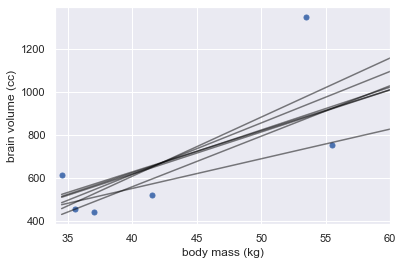

In [59]:
plt.plot('mass','brain', data = d, marker = '.',markersize = 10, linestyle = '')
for i in range(len(d)):
    d_new = d.drop(d.index[i])
    m0 = sm.formula.ols('brain ~ mass' , d_new).fit()
    x_pred = pd.DataFrame({'mass':np.linspace(d.mass.min(), d.mass.max(), num = 100)})
    y_pred = m0.predict(x_pred)
    plt.plot(x_pred, y_pred, color = 'black', alpha = .5)
    plt.xlim(34,60)
    plt.xlabel('body mass (kg)')
    plt.ylabel('brain volume (cc)')

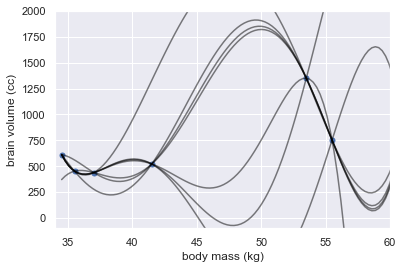

In [60]:
plt.plot('mass','brain', data = d, marker = '.',markersize = 10, linestyle = '')
for i in range(len(d)):
    d_new = d.drop(d.index[i])
    m0b = sm.formula.ols('brain ~ mass + I(mass**2) + I(mass**3) + I(mass**4) + I(mass**5)', d_new).fit()
    x_pred = pd.DataFrame({'mass':np.linspace(d.mass.min(), d.mass.max(), num = 100)})
    y_pred = m0b.predict(x_pred)
    plt.plot(x_pred, y_pred, color = 'black', alpha = .5)
    plt.xlim(34,60)
    plt.ylim(-100,2000)
    plt.xlabel('body mass (kg)')
    plt.ylabel('brain volume (cc)')
    
    

## Code 6.9

In [62]:
# fairly uncertain events
p = np.array([.3,.7])
print(-np.sum(p*np.log(p)))

# fairly certain events
p = np.array([.1,.9])
print(-np.sum(p*np.log(p)))

0.6108643020548935
0.3250829733914482


## Code 6.10

In [66]:
m6_1 = sm.formula.ols('brain ~ mass', d).fit()
-2 * m6_1.llf

94.92498968588757

## Code 6.11

In [72]:
d['mass_s'] = (d.mass - d.mass.mean()) / d.mass.std()
with pm.Model() as m6_8:
    alpha = pm.Normal('alpha',mu = d.brain.mean(), sigma = 1)
    beta = pm.Normal('beta', mu = 0, sigma = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = d.brain.std()*10)
    mu = alpha + beta*d.mass_s.values
    brain = pm.Normal('brain', mu = mu, sigma = sigma, observed = d.brain.values)
    tracem68 = pm.sample(draws = 1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:05<00:00, 1348.47draws/s]


In [91]:
theta = pm.summary(tracem68)['mean']
# Deviance is a measure of model fit which helps us in how far away we are from our target
# We can compare these measures against other models and the model which is "better" can be thought of as closer to the target
# this is optimistically biased as we can think of it as fit on our training set
# what we really care about is measure how it will do on our testing set, this is where AIC, BIC, WAIC come into play
dev = -2*np.sum(
    np.log(
        stats.norm.pdf(d.brain, loc = theta[0] + theta[1]*d.mass_s, scale = theta[2])
    )
)
dev

C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


100.19637069221764

## Code 6.12 - 6.14

Skipping for now, todo later

In [94]:
n = 20
kseq = np.arange(0, 5)
kseq

array([0, 1, 2, 3, 4])

## Code 6.15

In [195]:
data = pd.read_csv('.//data//cars.csv', sep=',')

with pm.Model() as m:
    alpha = pm.Normal('alpha',mu = 0, sigma = 100)
    beta = pm.Normal('beta', mu = 0, sigma = 10)
    sigma = pm.Uniform('sigma', lower = 0, upper = 30)
    mu = pm.Deterministic('mu', alpha + beta*data.speed)
    dist = pm.Normal('dist', mu = mu, sigma = sigma, observed = data.dist)
    tracem = pm.sample(draws = 1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████| 8000/8000 [00:08<00:00, 992.37draws/s]


## Code 6.16

In [196]:
n_samples = 1000
i = 1
ll = np.zeros((50,n_samples))

for i in range(n_samples):
    mu = tracem['alpha'][i] + tracem['beta'][i]*data['speed']
    ll[:,i] = np.log(
                    stats.norm.pdf(x = data['speed'], loc = mu, scale = tracem['sigma'][i])
                    )

## Code 6.17

In [200]:
#average the log likelihood for each observation
n_cases = data.shape[0]
llpd = np.zeros(50)
llpd = sc.special.logsumexp(ll, axis = 1) - np.log(n_samples)

## Code 6.18

In [204]:
pWAIC = np.var(ll,axis = 1)
pWAIC

array([0.02713516, 0.02713516, 0.01452899, 0.01452899, 0.01754028,
       0.02126046, 0.02523937, 0.02523937, 0.02523937, 0.02988583,
       0.02988583, 0.03646769, 0.03646769, 0.03646769, 0.03646769,
       0.04711179, 0.04711179, 0.04711179, 0.04711179, 0.06480398,
       0.06480398, 0.06480398, 0.06480398, 0.0933891 , 0.0933891 ,
       0.0933891 , 0.137571  , 0.137571  , 0.20291254, 0.20291254,
       0.20291254, 0.29583558, 0.29583558, 0.29583558, 0.29583558,
       0.42362098, 0.42362098, 0.42362098, 0.5944086 , 0.5944086 ,
       0.5944086 , 0.5944086 , 0.5944086 , 1.10184496, 1.45906844,
       1.90044364, 1.90044364, 1.90044364, 1.90044364, 2.43840541])

## Code 6.19

In [202]:
-2*(np.sum(llpd) - np.sum(pWAIC))

595.3577988794045

## Code 6.20

In [203]:
waic_vec = -2*(llpd - pWAIC)
np.sqrt(n_cases*np.var(waic_vec))

29.578313995467976

## Code 6.21

In [2]:
d = pd.read_csv('.\\data\\milk.csv', sep = ';')
d.columns = d.columns.str.replace('.','_')
dcc = d[~d.neocortex_perc.isna()].copy()
dcc['neocortex'] = dcc.neocortex_perc / 100
dcc.shape

(17, 9)

## Code 6.22

In [30]:
# when running the mulitple models we need to share the values for theano
a_start = dcc.kcal_per_g.mean()
sigma_start = dcc.kcal_per_g.std()

mass = tt.shared(np.log(dcc['mass'].values))
neocortex = tt.shared(dcc['neocortex'].values)
k_cal_shared = tt.shared(dcc.kcal_per_g.values)

with pm.Model() as m611:
    alpha = pm.Normal('alpha',mu = 0, sigma = 10, testval = a_start)
    mu = alpha + 0 * neocortex
    sigma = pm.HalfNormal('sigma',sigma =10, testval=sigma_start)
    k_cal = pm.Normal('k_cal', mu = alpha, sigma = sigma, observed = k_cal_shared)
    tracem611 = pm.sample(draws = 1000, tune = 1000)

with pm.Model() as m612:
    alpha = pm.Normal('alpha',mu = 0, sigma = 10, testval = a_start)
    betaneo = pm.Normal('betaneo', mu = 0 , sigma = 10)
    mu = alpha + betaneo*neocortex
    sigma = pm.HalfNormal('sigma',sigma =10, testval=sigma_start)
    k_cal = pm.Normal('k_cal', mu = mu, sigma = sigma, observed = k_cal_shared)
    tracem612 = pm.sample(draws = 1000, tune = 1000)
    
with pm.Model() as m613:
    alpha = pm.Normal('alpha',mu = 0, sigma = 10, testval = a_start)
    betamass = pm.Normal('betamass', mu = 0 , sigma = 10)
    mu = alpha + betamass*mass
    sigma = pm.HalfNormal('sigma',sigma =10, testval=sigma_start)
    k_cal = pm.Normal('k_cal', mu = mu, sigma = sigma, observed = k_cal_shared)
    tracem613 = pm.sample(draws = 1000, tune = 1000)
    
with pm.Model() as m614:
    alpha = pm.Normal('alpha',mu = 0, sigma = 10, testval = a_start)
    betamass = pm.Normal('betamass', mu = 0 , sigma = 10)
    betaneo = pm.Normal('betaneo', mu = 0 , sigma = 10)
    mu = alpha + betamass*mass + betaneo*neocortex
    sigma = pm.HalfNormal('sigma',sigma =10, testval=sigma_start)
    k_cal4 = pm.Normal('k_cal', mu = mu, sigma = sigma, observed = k_cal_shared)
    tracem614 = pm.sample(draws = 1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:05<00:00, 1446.74draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, betaneo, alpha]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████| 8000/8000 [00:18<00:00, 437.49draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 77 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5432968783604589, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for som

## Code 6.23

In [31]:
pm.waic(trace=tracem614, model = m614)

C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)
C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=-16.625887212149703, WAIC_se=5.388959079075291, p_WAIC=3.2809318637685814, var_warn=1)

## Code 6.24

In [34]:
m611.name = 'm611'
m612.name = 'm612'
m613.name = 'm613'
m614.name = 'm614'
df_compare = pm.compare({m611: tracem611,
           m612: tracem612,
           m613: tracem613,
           m614: tracem614})
df_compare

C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)
C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
m614,-16.63,3.28,0,0.97,5.39,0,1
m613,-8.84,2.04,7.79,0,4.09,3.72,1
m611,-8.69,1.34,7.94,0.03,3.62,5.2,0
m612,-6.44,2.35,10.18,0,3.64,5.48,1


## Code 6.25

C:\Users\JOSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


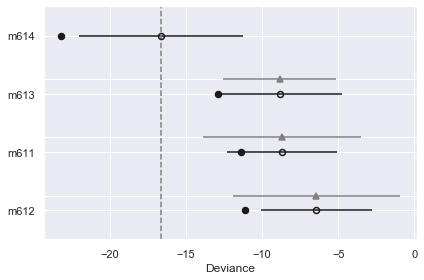

In [33]:
pm.compareplot(df_compare)
plt.tight_layout()
plt.show()

## Code 6.26

In [28]:
diff = np.random.normal(6.7, 7.27, size = int(1e5))
sum(diff<0)/int(1e5)

0.17924

## Code 6.27

In [47]:
coeftab = pd.DataFrame({'m611': pm.summary(tracem611)['mean'],
                         'm612': pm.summary(tracem612)['mean'],
                         'm613': pm.summary(tracem613)['mean'],
                         'm614': pm.summary(tracem614)['mean']}).round(3)
coeftab

C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,m611,m612,m613,m614
alpha,0.657,0.365,0.707,-1.087
betamass,NaN,NaN,-0.033,-0.097
betaneo,NaN,0.433,NaN,2.800
sigma,0.189,0.188,0.184,0.138


## Code 6.28

C:\Users\JOSH\Anaconda3\lib\site-packages\arviz\plots\forestplot.py:207: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
C:\Users\JOSH\Anaconda3\lib\site-packages\arviz\plots\forestplot.py:208: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False
C:\Users\JOSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


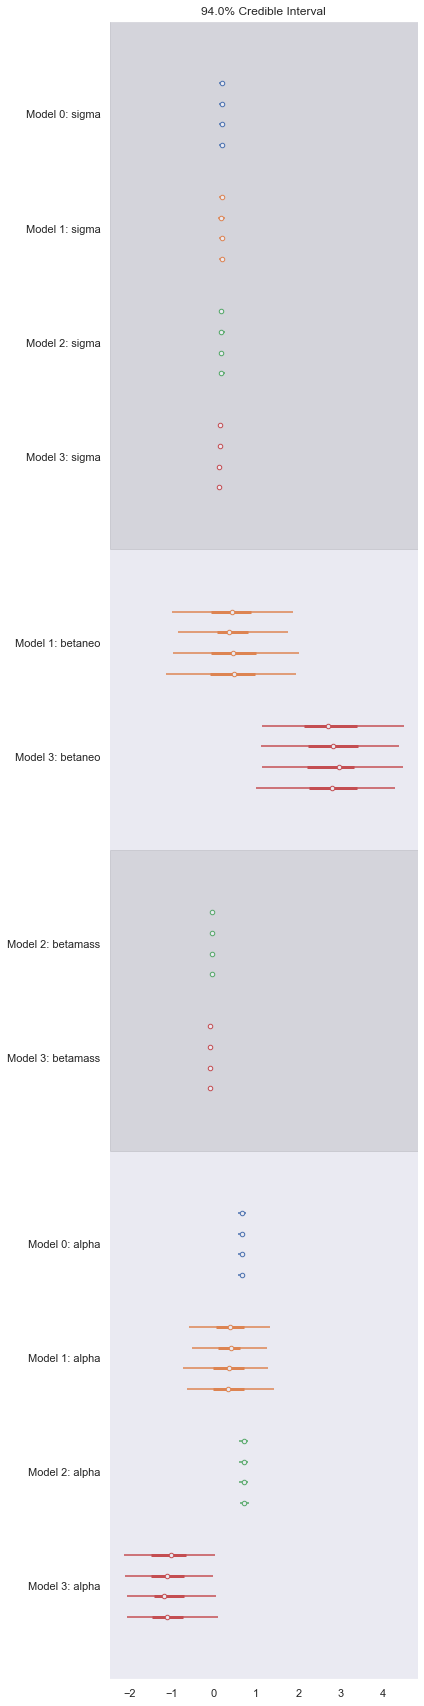

In [36]:
pm.forestplot([tracem611, tracem612, tracem613, tracem614])
plt.tight_layout()
plt.show()

In [105]:
with pm.Model() as m615:
    alpha = pm.Normal('alpha', mu = 0, sigma = 10) 
    beta = pm.Normal('beta', mu = 0, sigma = 10)
    sigma = pm.Uniform('sigma', lower = 0, upper = 30)
    mu = alpha + beta*data.speed.values
    dist = pm.Normal('dist', mu = mu, sigma = sigma, observed = data.dist.values)
    trace615 = pm.sample(draws = 1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████| 8000/8000 [00:08<00:00, 994.80draws/s]


In [106]:
varnames = ['sigma', 'beta', 'alpha']
pm.summary(trace615, var_names=varnames)

C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
sigma,15.871837,1.722487,0.035238,12.836612,19.378482,1823.449870,1.000914
beta,3.597274,0.364302,0.009820,2.876289,4.305178,1279.941181,1.002473
alpha,-11.867413,5.773241,0.160611,-23.298154,-0.794827,1198.774806,1.002238


['alpha', 'beta', 'sigma_interval__', 'sigma']

# Practice

## Easy

### 6E1

The 3 motivating criteria for information entropy are 
1. Uncertanity should be continuour
2. as possible events increase so should uncertainty
3. uncertainity should be additive

### 6E2

In [4]:
p = np.array([.3,.7])
print(-np.sum(p*np.log(p)))

0.6108643020548935


### 6E3

In [5]:
p = np.array([.2,.25,.25,.3])
print(-np.sum(p*np.log(p)))

1.3762266043445461


### 6E4

In [7]:
p = np.array([.33,.33,.33])
print(-np.sum(p*np.log(p)))

1.097575998276395


## Medium

### 6M1

All of these information criteria is a way of computing and estimating what our out of sample deviance is

AIC is the oldest, most restrictive and simplest of the three metrics which is trying to estimate out of sample deviance. It estimates this by take 2*number of parameters. This is the least general as it has hard assumptions such as multivariate gaussian, flat priors, N>>K

While AIC is a point deviance at the MAP, DIC is a distribution of deviances. Given this distribution of deviances we are provided more information about predictive uncertainty and a better evaluater of out of sample deviance. DIC is a bit more general as it still assumes multivariate gaussian but it is calculated from the posterior distribution

WAIC is another improvement on top of DIC. It is less restrictive than AIC/BIC as it doesn't assume a multivariate gaussian posterior. This is the most genreal as it is pointwise calcs and doesn't assume a multivariate gaussian

### 6M2

Model Selection - We are trying to answer the question of what model will provide us the best generalizaion on out of sample data. When we attempt to answer this we need a way to estimate what out of sample
performance will be. In this case we use AIC/DIC/WAIC as an estimate of the average deviance on the new sample. These different information criterion helps us select the most plausiable model. When we choose one model and throw away the others we are, potentially, throwing away important differences between the models. As in one model may be more accurate in one area of the data while another, while different, may be better in a different portion of the data.(195)

Model Average - When choosing a model it's often common practice to select the lowest AIC/DIC/WAIC value and discard the others. This can be an issue as we a losing potential information when we discard the others. This is more apparent when there are small differences between model selection values. Therefore, it's important to average (ensemble) different posterior predictions (203). This guards us against being overconfident in one model as a predictor will never be more influential as it is in a single model (204). The book states, "Just as relative posterior probability provides advice about how confident we meight be about parameters (conditional on the model), relative model accuracy provides advice about how confident we might be about models." This is another way we can help guard against overconfidence in model structure. Model averaging doesn't necessarily lose information. We're blending predicitions together. At times this can make a small difference and other times it can make a large difference which could lead to data dredging (205)



### 6M3

Since DIC(190) and WAIC(192) sum over all i's it's neccessary to only use the same number of observations as a way to compare models. Using different observations across the model selection metrics will output different DIC, WAIC numbers and ultimatley skew the model selection process


In [15]:
# Example
d = pd.read_csv('.\data\WaffleDivorce.csv', sep = ';')
d.columns = d.columns.str.lower()
d['mam_s'] = (d.medianagemarriage - d.medianagemarriage.mean()) / d.medianagemarriage.std()
d['marr_s'] = (d.marriage - d.marriage.mean()) / d.marriage.std()
indx_300 = np.random.choice(np.arange(0,len(d)),size = 300, replace=True)
indx_400 = np.random.choice(np.arange(0,len(d)),size = 300, replace=True)
d3 = d.iloc[indx_300,:]
d4 = d.iloc[indx_400,:]

In [16]:
with pm.Model() as m6m3a:
    alpha = pm.Normal('alpha', mu =0, sigma = 10)
    beta1 =  pm.Normal('beta_mams', mu = 0, sigma = 1)
    beta2 =  pm.Normal('beta_marrs', mu = 0, sigma = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper =10)
    mu = pm.Deterministic('mu', alpha + beta1*d3.mam_s.values + beta2*d3.marr_s.values)
    divorce = pm.Normal('divorce', mu = mu, sigma = sigma, observed = d3.divorce.values)
    tracem63ma = pm.sample(draws=1000, tune = 1000)
    
with pm.Model() as m6m3b:
    alpha = pm.Normal('alpha', mu =0, sigma = 10)
    beta1 =  pm.Normal('beta_mams', mu = 0, sigma = 1)
    beta2 =  pm.Normal('beta_marrs', mu = 0, sigma = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper =10)
    mu = pm.Deterministic('mu', alpha + beta1*d4.mam_s.values + beta2*d4.marr_s.values)
    divorce = pm.Normal('divorce', mu = mu, sigma = sigma, observed = d4.divorce.values)
    tracem63mb = pm.sample(draws=1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_marrs, beta_mams, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:07<00:00, 1076.91draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_marrs, beta_mams, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:07<00:00, 1073.18draws/s]


In [21]:
print(pm.waic(tracem63ma, m6m3a))
print(pm.waic(tracem63mb, m6m3b))


C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)


WAIC_r(WAIC=1105.9664364564965, WAIC_se=28.81727052987504, p_WAIC=5.5823235534710225, var_warn=0)


C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=1045.3640541171178, WAIC_se=32.88197026559761, p_WAIC=5.794262003939729, var_warn=1)


### 6M4

The effective nmber of parameters decrease because the parameters are regularized. This means the parameters are more skeptical about parameter values outside of our sigma. This is meant to make the model less flexible. 

In [25]:
with pm.Model() as m6m3c:
    alpha = pm.Normal('alpha', mu =0, sigma = 10)
    beta1 =  pm.Normal('beta_mams', mu = 0, sigma = 20)
    beta2 =  pm.Normal('beta_marrs', mu = 0, sigma = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper =10)
    mu = pm.Deterministic('mu', alpha + beta1*d3.mam_s.values + beta2*d3.marr_s.values)
    divorce = pm.Normal('divorce', mu = mu, sigma = sigma, observed = d3.divorce.values)
    tracem63mc = pm.sample(draws=1000, tune = 1000)
    
with pm.Model() as m6m3d:
    alpha = pm.Normal('alpha', mu =0, sigma = 10)
    beta1 =  pm.Normal('beta_mams', mu = 0, sigma = .1)
    beta2 =  pm.Normal('beta_marrs', mu = 0, sigma = .1)
    sigma = pm.Uniform('sigma', lower = 0, upper =10)
    mu = pm.Deterministic('mu', alpha + beta1*d3.mam_s.values + beta2*d3.marr_s.values)
    divorce = pm.Normal('divorce', mu = mu, sigma = sigma, observed = d3.divorce.values)
    tracem63md = pm.sample(draws=1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_marrs, beta_mams, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:07<00:00, 1105.48draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_marrs, beta_mams, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:07<00:00, 1137.54draws/s]


In [28]:
print(pm.waic(tracem63mc, m6m3c), flush = True)
print(pm.waic(tracem63md, m6m3d), flush = True)


C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)


WAIC_r(WAIC=1106.5176375136439, WAIC_se=28.899467359686074, p_WAIC=5.925392625373145, var_warn=0)
WAIC_r(WAIC=1127.7438401008749, WAIC_se=22.7351995090254, p_WAIC=3.71089442988643, var_warn=0)


### 6M5

informative priors reduce overfitting because it's telling the machine before even seeing the data be very skeptical of parameter values outside of our sigma values. 

### 6M6

Overly informative priors can result in underfitting as they are too certain about a parameter and may not give a likelihood to other parameters out side of its distribution. They prvent the model from learning from the data (187)

## Hard

### 6H1

In [144]:
d = pd.read_csv('./data/Howell1.csv', sep = ';')
d['age_s'] = (d.age - d.age.mean()) / d.age.std()
np.random.seed(1000)
i = np.random.choice(np.arange(0,len(d)),size = int((len(d)/2)))
d1 = d.iloc[i,:]
d1 = d1.reset_index(drop = True)
d2 = d.iloc[~i,:]

In [49]:
with pm.Model() as m6h1a:
    alpha = pm.Normal('alpha', mu =0, sigma = 20)
    beta =  pm.Normal('b_age2', mu = 0, sigma = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper =20)
    mu = pm.Deterministic('mu', alpha + beta*d1.age_s.values)
    divorce = pm.Normal('height', mu = mu, sigma = sigma, observed = d1.height.values)
    t61a = pm.sample(draws=1000, tune = 1000)
    
with pm.Model() as m6h1b:
    alpha = pm.Normal('alpha', mu =0, sigma = 20)
    beta =  pm.Normal('b_age', mu = 0, sigma = 20)
    beta2 =  pm.Normal('b_age2', mu = 0, sigma = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper =20)
    mu = pm.Deterministic('mu', alpha + beta*d1.age_s.values + beta2*d1.age_s.values**2)
    divorce = pm.Normal('height', mu = mu, sigma = sigma, observed = d1.height.values)
    t61b = pm.sample(draws=1000, tune = 1000)
    
with pm.Model() as m6h1c:
    alpha = pm.Normal('alpha', mu =0, sigma = 20)
    beta =  pm.Normal('b_age', mu = 0, sigma = 20)
    beta2 =  pm.Normal('b_age2', mu = 0, sigma = 20)
    beta3 =  pm.Normal('b_age3', mu = 0, sigma = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper =20)
    mu = pm.Deterministic('mu', alpha + beta*d1.age_s.values + beta2*d1.age_s.values**2 + beta3*d1.age_s.values**3)
    divorce = pm.Normal('height', mu = mu, sigma = sigma, observed = d1.height.values)
    t61c = pm.sample(draws=1000, tune = 1000)

with pm.Model() as m6h1d:
    alpha = pm.Normal('alpha', mu =0, sigma = 20)
    beta =  pm.Normal('b_age', mu = 0, sigma = 20)
    beta2 =  pm.Normal('b_age2', mu = 0, sigma = 20)
    beta3 =  pm.Normal('b_age3', mu = 0, sigma = 20)
    beta4 =  pm.Normal('b_age4', mu = 0, sigma = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper =20)
    mu = pm.Deterministic('mu', alpha + beta*d1.age_s.values + beta2*d1.age_s.values**2 + beta3*d1.age_s.values**3 + beta4*d1.age_s.values**4)
    divorce = pm.Normal('height', mu = mu, sigma = sigma, observed = d1.height.values)
    t61d = pm.sample(draws=1000, tune = 1000)

with pm.Model() as m6h1e:
    alpha = pm.Normal('alpha', mu =0, sigma = 20)
    beta =  pm.Normal('b_age', mu = 0, sigma = 20)
    beta2 =  pm.Normal('b_age2', mu = 0, sigma = 20)
    beta3 =  pm.Normal('b_age3', mu = 0, sigma = 20)
    beta4 =  pm.Normal('b_age4', mu = 0, sigma = 20)
    beta5 =  pm.Normal('b_age5', mu = 0, sigma = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper = 20)
    mu = pm.Deterministic('mu', alpha + beta*d1.age_s.values + beta2*d1.age_s.values**2 + beta3*d1.age_s.values**3 + beta4*d1.age_s.values**4 + beta5*d1.age_s.values**5)
    divorce = pm.Normal('height', mu = mu, sigma = sigma, observed = d1.height.values)
    t61e = pm.sample(draws=1000, tune = 1000)
    

with pm.Model() as m6h1f:
    alpha = pm.Normal('alpha', mu =0, sigma = 20)
    beta =  pm.Normal('b_age', mu = 0, sigma = 20)
    beta2 =  pm.Normal('b_age2', mu = 0, sigma = 20)
    beta3 =  pm.Normal('b_age3', mu = 0, sigma = 20)
    beta4 =  pm.Normal('b_age4', mu = 0, sigma = 20)
    beta5 =  pm.Normal('b_age5', mu = 0, sigma = 20)
    beta6 =  pm.Normal('b_age6', mu = 0, sigma = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper = 20)
    mu = pm.Deterministic('mu', alpha + beta*d1.age_s.values + beta2*d1.age_s.values**2 + beta3*d1.age_s.values**3 + beta4*d1.age_s.values**4 + beta5*d1.age_s.values**5 + beta6*d1.age_s.values**6)
    divorce = pm.Normal('height', mu = mu, sigma = sigma, observed = d1.height.values)
    t61f = pm.sample(draws=1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_age2, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:07<00:00, 1094.73draws/s]
The acceptance probability does not match the target. It is 0.9320828689487796, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_age2, b_age, alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:07<00:00, 1070.89draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_age3, b_age2, b_age, alpha]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████| 8000/8000 [00:16<00:00, 496.05draws/s]
Auto-assigning NUTS sa

In [55]:
m6h1a.name = 'normal'
m6h1b.name = 'two'
m6h1c.name = 'three'
m6h1d.name = 'four'
m6h1e.name = 'five'
m6h1f.name = 'six'
df_comp_WAIC = pm.compare({m6h1a: t61a,
                           m6h1b: t61b,
                           m6h1c: t61c,
                           m6h1d: t61d, 
                           m6h1e: t61e,
                           m6h1f: t61f})


C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)
C:\Users\JOSH\Anaconda3\lib\site-packages\pymc3\stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


In [56]:
df_comp_WAIC.sort_values(by = 'WAIC',ascending = True)

,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
six,1878.76,7.41,0,0.78,21.9,0,0
four,1882.76,5.14,4.01,0.18,22.93,5.37,0
five,1885,6.15,6.25,0,22.86,5.3,0
three,1913.01,6.18,34.25,0.03,22.23,12.79,1
two,2138.56,6.57,259.8,0,26.18,29.68,1
normal,2412.76,2.71,534,0,19.54,26.42,0


USing the WAIC value models six, four, & five have the lowest WAIC. Looking at the weights, models six, four and three had akaike weights > 0. As a reminder weights can be read heuristically as an estimated probability that each model will perform best on future data. It's rather interesting that while model three has a higher WAIC than model five it has more akaike weight than five. My hypothesis here is derived from model 5 being overfit to the model, potentially due to relatively weak priors.

## 6H2

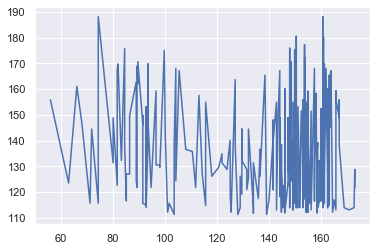

In [151]:
idx = d1.height.sort_values()
plt.plot(d1.height.sort_values(), t61a['mu'].T.mean(1))
plt.show()

,height,weight,age,male,age_s
0,160.9852,46.691626,51.0,1,1.0438
1,129.5400,25.627948,14.0,0,-0.7396
2,163.8300,47.910655,57.0,1,1.3330
3,157.4800,45.869491,41.0,1,0.5618
4,93.3450,13.182517,5.0,1,-1.1734
